# Hackathon

# prerequisites to search snp variants on ebi

 - SNP ID on ensembl
 - position of SNP and whether it's on forward, 1 or reverse 2 strand?
 
 
 To demonstrate the example of in GAPIT results file was used.

http://rest.ensemblgenomes.org/documentation/info/variation_id
## instructions for searching by Ensembl snp id

In [3]:
import requests, sys
 
server = "http://rest.ensemblgenomes.org"
ext = "/variation/oryza_sativa/rs18641341?"
# alter by species/id of snp
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

{'source': 'The European Variation Archive (EVA) is an open-access database of all types of genetic variation data from all species', 'mappings': [{'location': '1:6532747-6532747', 'assembly_name': 'IRGSP-1.0', 'end': 6532747, 'seq_region_name': '1', 'strand': 1, 'coord_system': 'chromosome', 'allele_string': 'C/T', 'start': 6532747}], 'name': 'rs18641341', 'MAF': None, 'ambiguity': 'Y', 'var_class': 'SNP', 'synonyms': ['vcZ248IAX'], 'evidence': [], 'ancestral_allele': None, 'minor_allele': None, 'most_severe_consequence': 'intergenic_variant'}


http://rest.ensemblgenomes.org/documentation/info/overlap_region

## instructions for searching by SNP position

In [4]:
import requests, sys
 
server = "http://rest.ensemblgenomes.org"
ext = "/overlap/region/oryza_sativa/1:6532747-6532747:1?feature=variation"
#change by species, chr:start-end(same):foward vs reverse ? feature is variation
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[{'source': 'EVA', 'alleles': ['C', 'T'], 'feature_type': 'variation', 'assembly_name': 'IRGSP-1.0', 'clinical_significance': [], 'end': 6532747, 'seq_region_name': '1', 'consequence_type': 'intergenic_variant', 'strand': 1, 'id': 'rs18641341', 'start': 6532747}]


## SNP effects

Go to ENsemblPLants --> Oryza Sativa --> Example variant --> search by position of SNP. 

http://plants.ensembl.org/Oryza_sativa/Info/Index To search by either ID or Position.

The above database will not find the SNP by id, position only.
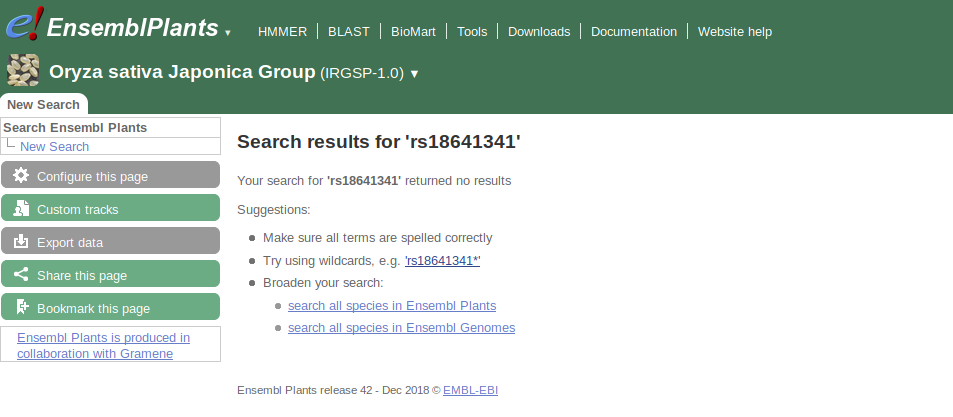

We need to alter the url to find by ID.
from:
http://plants.ensembl.org/Oryza_sativa/Info/Index?db=core

http://plants.ensembl.org/Oryza_sativa/Info/Index?v=<ensembl snpID>


Alternatively use the larger search bar

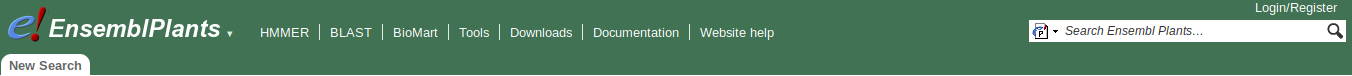

VCF data always forward strand.

## Summary

It is clear that searching by position of snps is better than by ID in that we get the same important information on effect of snps as indicated by 'consequence_type': 'intergenic_variant'

Another problem with ID searching is that we cannot find it in EnsemblPlants database. We can only change the url to search snp by their id.

# Finding genes associated to snps

You can change the search by position a little (shown below) or alternatively) you can adapt the codes from github's team3 challenge. However, they both make the position of 1000bp non-functional.

In [7]:
import requests, sys
 
server = "http://rest.ensemblgenomes.org"
ext = "/overlap/region/oryza_sativa/1:6532747-6532747:1?feature=gene"
#change feature to genes to search for genes?
 
r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
if not r.ok:
  r.raise_for_status()
  sys.exit()
 
decoded = r.json()
print(repr(decoded))

[]


### Biomart problem



The biomart function on ensembl plant enables you to specify distance between gene and snp.

THere is no way for python to get biomart API though.

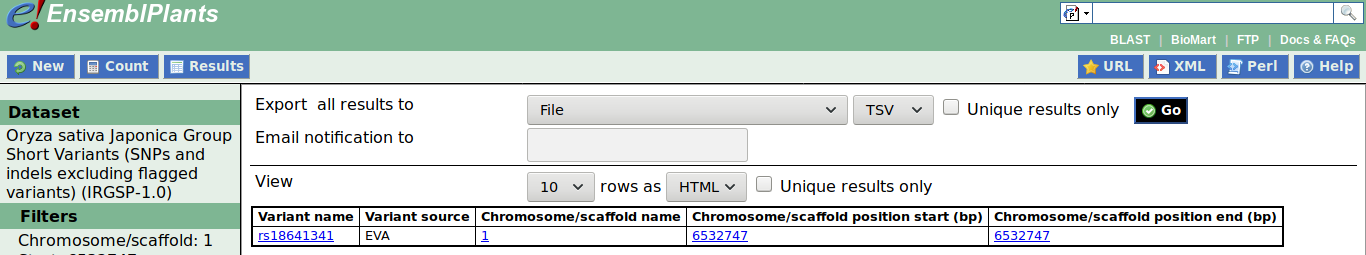

80486218 snp definitely has a gene associated with it. Try its position in the url to see if you can recover the genes.